In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df  = pd.read_csv('../data/housing.csv')

In [9]:
df.columns

Index(['Avg. Income', 'Avg. House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
df.drop(['Address'],axis=1, inplace=True)

In [11]:
df.head(5)

,Avg. Income,Avg. House Age,Avg. Number of Rooms,Avg. Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


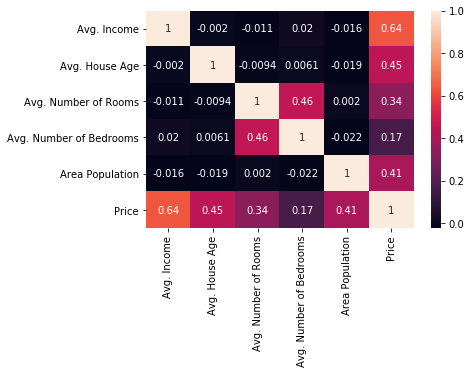

In [12]:
sns.heatmap(df.corr(),annot = True)

In [13]:
x = df.drop(['Price'], axis=1)
y = df[['Price']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(lm.intercept_)

[-2640159.79681324]


In [20]:
lm.coef_

array([[  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
          2.23380186e+03,   1.51504200e+01]])

In [21]:
table  = pd.DataFrame(data=lm.coef_.reshape(5,1),index=x_train.columns,columns=['Linear Regression Coefficient'])

In [22]:
table

,Linear Regression Coefficient
Avg. Income,21.528276
Avg. House Age,164883.282027
Avg. Number of Rooms,122368.678023
Avg. Number of Bedrooms,2233.801864
Area Population,15.150420


In [23]:
predictions = lm.predict(x_test)

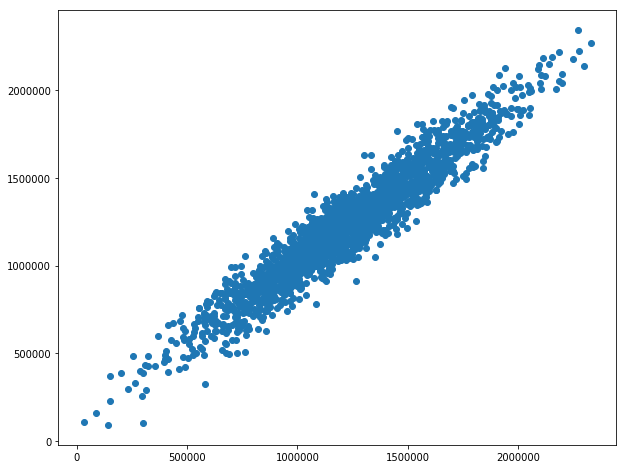

In [24]:
import seaborn as sns
plt.figure(figsize=[10,8])
plt.scatter(y_test.values, predictions)
#plt.xscale('linear')

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.2225072
MSE: 10460958905.8
RMSE: 102278.829216


In [27]:
np.mean(y)

Price    1.232073e+06
dtype: float64